In [176]:
import numpy as np 
import matplotlib.pyplot as mtp  
import pandas as pd  
import seaborn as sn

In [177]:
df = pd.read_excel(r'D:\MBATech\badm\031020 mt2\badm_mt2.xlsx', sheet_name='Sheet1')

In [178]:
#print(df)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gmat             40 non-null     int64  
 1   gpa              40 non-null     float64
 2   work_experience  40 non-null     int64  
 3   admitted         40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [180]:
x= df.iloc[:, [0,2]].values  
y= df.iloc[:, 3].values  

In [181]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [182]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

# Logistic Regression

In [183]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
lr= LogisticRegression(solver='liblinear', C=10) 
lr.fit(x_train, y_train)  

LogisticRegression(C=10, solver='liblinear')

In [184]:
y_pred= lr.predict(x_test)

In [185]:
import statsmodels.api as sm      
x_train = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     41.61
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           5.66e-09
Time:                        09:02:35   Log-Likelihood:               -0.60641
No. Observations:                  30   AIC:                             7.213
Df Residuals:                      27   BIC:                             11.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4667      0.048      9.821      0.000       0.369       0.564
x1             0.2200      0.052      4.205      0.000       0.113       0.327
x2             0.2927      0.052      5.594      0.000       0.185       0.400
==============================================================================
Omnibus:                        2.864   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                1.847
Skew:                          -0.599   Prob(JB):                        0.397
Kurtosis:                       3.210   Cond. No.                         1.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[4 1]
 [1 4]]


In [187]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



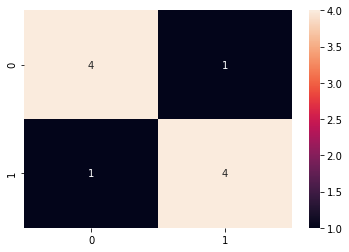

In [188]:
sn.heatmap(confusion_matrix, annot=True)